In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных

In [2]:
data = pd.read_csv('data/car_prices.csv', sep=",")

In [3]:
data.shape

(558837, 16)

In [4]:
data.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 558837


# Обработка пропусков в данных

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((558837, 16), (558837, 3))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((558837, 16), (472325, 16))

In [10]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### Обработка пропусков в числовых данных

In [11]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка condition. Тип данных float64. Количество пустых значений 11820, 2.12%.
Колонка odometer. Тип данных float64. Количество пустых значений 94, 0.02%.
Колонка mmr. Тип данных float64. Количество пустых значений 38, 0.01%.
Колонка sellingprice. Тип данных float64. Количество пустых значений 12, 0.0%.


In [12]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,condition,odometer,mmr,sellingprice
0,5.0,16639.0,20500.0,21500.0
1,5.0,9393.0,20800.0,21500.0
2,45.0,1331.0,31900.0,30000.0
3,41.0,14282.0,27500.0,27750.0
4,43.0,2641.0,66000.0,67000.0
...,...,...,...,...
558832,45.0,18255.0,35300.0,33000.0
558833,5.0,54393.0,30200.0,30800.0
558834,48.0,50561.0,29800.0,34000.0
558835,38.0,16658.0,15100.0,11100.0


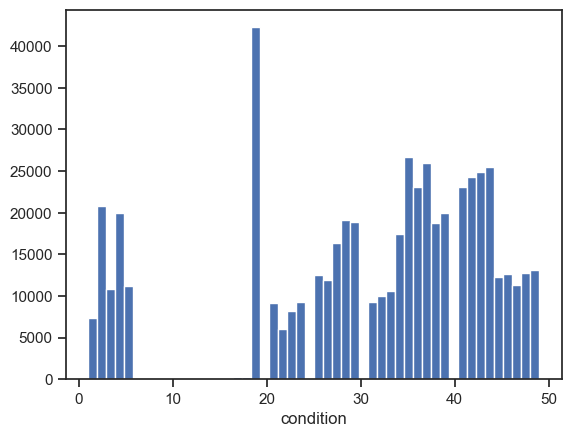

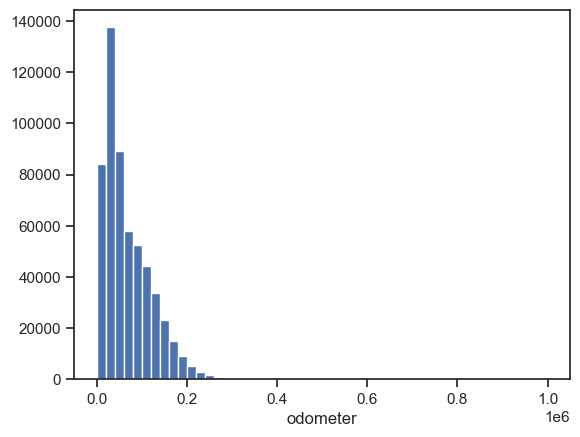

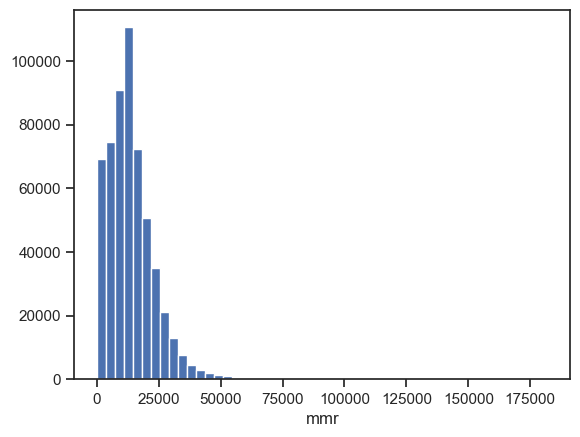

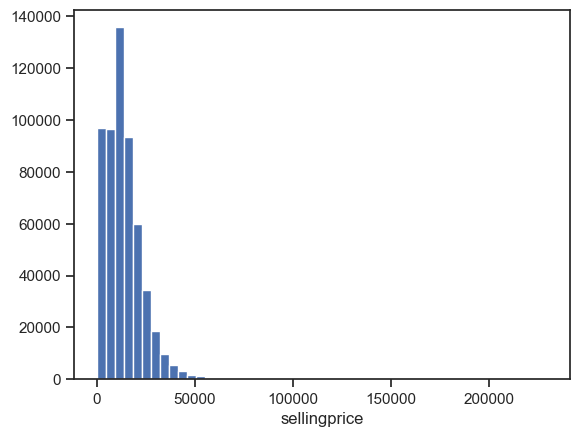

In [13]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [15]:
strategies=['mean', 'median', 'most_frequent']

In [16]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [17]:
test_num_impute_col(data, 'condition', strategies[0])

('condition', 'mean', 11820, 30.672364844237016, 30.672364844237016)

In [18]:
test_num_impute_col(data, 'condition', strategies[1])

('condition', 'median', 11820, 35.0, 35.0)

In [19]:
test_num_impute_col(data, 'condition', strategies[2])

('condition', 'most_frequent', 11820, 19.0, 19.0)

**Вывод:** Посмотрев на диграмму, можно заметить, что лучше всего заменять пропущенные значения на значения медианы или моды, так как при такой замене гистограмма значений не особо изменится, следовательно и набор данных в данной колонке не испортится. Если мы сделаем замену на моду, то получим чуть больше значений 19, но это не повлияет на весь набор, так как строк со значением condition, равным 19, значительно больше, чем остальных. Похожая ситуация будет, если мы заменим пропущенные значения на медиану: так как в области со значение condition, близком 35, значительное количество строк, то зависимости, связанные с данным столбцом, не должны значительно поменяться.

In [60]:
data.fillna({'condition': 19}, inplace=True)

In [61]:
test_num_impute_col(data, 'odometer', strategies[0])

('odometer', 'mean', 94, 68320.01776666554, 68320.01776666554)

In [62]:
test_num_impute_col(data, 'odometer', strategies[1])

('odometer', 'median', 94, 52254.0, 52254.0)

In [63]:
test_num_impute_col(data, 'odometer', strategies[2])

('odometer', 'most_frequent', 94, 1.0, 1.0)

**Вывод:** Посмотрев на диаграмму, можно сказать, что замена средним наиболее предпочтительна, так как значение, получаемое с помощью среднего наиболее близкое к пику гистограммы, хотя по сравнению с общим числом строк число строк с пропусками настолько мало, что данными 94 строками можно пренебречь.

In [28]:
test_num_impute_col(data, 'mmr', strategies[0])

('mmr', 'mean', 38, 13769.377495306899, 13769.377495306899)

In [29]:
test_num_impute_col(data, 'mmr', strategies[1])

('mmr', 'median', 38, 12250.0, 12250.0)

In [30]:
test_num_impute_col(data, 'mmr', strategies[2])

('mmr', 'most_frequent', 38, 12500.0, 12500.0)

**Вывод:** Посмотрев на диаграмму, можно сделать вывод, что наиболее подходящее значение для замены мы получаем с помощью моды, но значений с пропусками настолько мало, что проще ими пренебречь.

In [31]:
test_num_impute_col(data, 'sellingprice', strategies[0])

('sellingprice', 'mean', 12, 13611.358810003132, 13611.358810003132)

In [32]:
test_num_impute_col(data, 'sellingprice', strategies[1])

('sellingprice', 'median', 12, 12100.0, 12100.0)

In [33]:
test_num_impute_col(data, 'sellingprice', strategies[2])

('sellingprice', 'most_frequent', 12, 11000.0, 11000.0)

**Вывод:** Значений с пропусками по сравнению с общим числов значений пренебрежимо мало, поэтому мы пренебрегаем ими и удаляем.

### Обработка пропусков в категориальных данных

In [34]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Колонка make. Тип данных object. Количество пустых значений 10301, 1.84%.
Колонка model. Тип данных object. Количество пустых значений 10399, 1.86%.
Колонка trim. Тип данных object. Количество пустых значений 10651, 1.91%.
Колонка body. Тип данных object. Количество пустых значений 13195, 2.36%.
Колонка transmission. Тип данных object. Количество пустых значений 65352, 11.69%.
Колонка vin. Тип данных object. Количество пустых значений 4, 0.0%.
Колонка color. Тип данных object. Количество пустых значений 749, 0.13%.
Колонка interior. Тип данных object. Количество пустых значений 749, 0.13%.
Колонка saledate. Тип данных object. Количество пустых значений 12, 0.0%.


Колонки vin, color, inerior, saledate рассматривать не будем, так как количество пустых значений в них пренебрежимо мало по сравнению с общим количеством строк в таблице.

In [35]:
cat_temp_data = data[['make']]
cat_temp_data.head()

,make
0,Kia
1,Kia
2,BMW
3,Volvo
4,BMW


In [36]:
cat_temp_data['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [37]:
cat_temp_data[cat_temp_data['make'].isnull()].shape

(10301, 1)

In [38]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data[['make']] = data_imp2
data_imp2

array([['Kia'],
       ['Kia'],
       ['BMW'],
       ...,
       ['BMW'],
       ['Nissan'],
       ['Ford']], dtype=object)

In [39]:
np.unique(data_imp2)

array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT',
       'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki',
       'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream',
       'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet',
       'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk',
       'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk',
       'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln',
       'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b',
       'mercury', 'mitsubish

In [40]:
cat_temp_data = data[['model']]
cat_temp_data.head()

,model
0,Sorento
1,Sorento
2,3 Series
3,S60
4,6 Series Gran Coupe


In [41]:
cat_temp_data['model'].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       nan, 'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',


In [42]:
cat_temp_data[cat_temp_data['model'].isnull()].shape

(10399, 1)

In [43]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data[['model']] = data_imp2
data_imp2

array([['Sorento'],
       ['Sorento'],
       ['3 Series'],
       ...,
       ['X5'],
       ['Altima'],
       ['F-150']], dtype=object)

In [44]:
np.unique(data_imp2)

array(['1', '1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '350', '3500', '350Z', '350z', '360', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'ATS', 'Acadia',
       'Accent', 'Accord', 'Accord Crosstour', 'Accord Hybrid', 'Achieva',
       'ActiveHybrid 5', 'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio',
       'Alero', 'Altima', 'Altima Hybrid', 'Amanti', 'Amigo', 'Armada',
       'Ascender', 'Aspen', 'Aspire', 'Astra', 'Astro', 'Astro Cargo',
       'Au

In [45]:
cat_temp_data = data[['trim']]
cat_temp_data.head()

,trim
0,LX
1,LX
2,328i SULEV
3,T5
4,650i


In [46]:
cat_temp_data['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

In [47]:
cat_temp_data[cat_temp_data['trim'].isnull()].shape

(10651, 1)

In [48]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data[['trim']] = data_imp2
data_imp2

array([['LX'],
       ['LX'],
       ['328i SULEV'],
       ...,
       ['xDrive35d'],
       ['2.5 S'],
       ['XLT']], dtype=object)

In [49]:
np.unique(data_imp2)

array(['!', '& coun fwd', '& coun fwd limited', ..., 'yuk xl 4x2 slt',
       'z06', 'zx3'], dtype=object)

In [50]:
cat_temp_data = data[['body']]
cat_temp_data.head()

,body
0,SUV
1,SUV
2,Sedan
3,Sedan
4,Sedan


In [51]:
cat_temp_data[cat_temp_data['body'].isnull()].shape

(13195, 1)

In [52]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data[['body']] = data_imp2
data_imp2

array([['SUV'],
       ['SUV'],
       ['Sedan'],
       ...,
       ['SUV'],
       ['sedan'],
       ['SuperCrew']], dtype=object)

In [53]:
np.unique(data_imp2)

array(['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon',
       'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab',
       'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Double Cab',
       'E-Series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible',
       'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe',
       'Genesis Coupe', 'GranTurismo Convertible', 'Hatchback',
       'King Cab', 'Koup', 'Mega Cab', 'Minivan', 'Navitgation',
       'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab',
       'Ram Van', 'Regular Cab', 'SUV', 'Sedan', 'SuperCab', 'SuperCrew',
       'TSX Sport Wagon', 'Transit Van', 'Van', 'Wagon', 'Xtracab',
       'access cab', 'beetle convertible', 'cab plus 4', 'club cab',
       'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe',
       'cts wagon', 'cts-v coupe', 'double cab', 'e-series van',
       'elantra coupe', 'extended cab', 'g convertible', 'g coupe',
       'g sedan', 'g37 convertib

In [54]:
cat_temp_data = data[['transmission']]
cat_temp_data.head()

,transmission
0,automatic
1,automatic
2,automatic
3,automatic
4,automatic


In [55]:
cat_temp_data['transmission'].unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

In [56]:
cat_temp_data[cat_temp_data['transmission'].isnull()].shape

(65352, 1)

In [57]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data[['ransmission']] = data_imp2
data_imp2

array([['automatic'],
       ['automatic'],
       ['automatic'],
       ...,
       ['automatic'],
       ['automatic'],
       ['automatic']], dtype=object)

In [58]:
np.unique(data_imp2)

array(['Sedan', 'automatic', 'manual', 'sedan'], dtype=object)

In [65]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((558837, 17), (492791, 17))

## Преобразование категориальных признаков в числовые

### Кодирование категорий целочисленными значениями

In [68]:
from sklearn.preprocessing import OrdinalEncoder

In [69]:
data_oe = data[['make', 'color']]
data_oe.head()

,make,color
0,Kia,white
1,Kia,white
2,BMW,gray
3,Volvo,white
4,BMW,gray


In [70]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Kia', 'white'],
       ['Kia', 'white'],
       ['BMW', 'gray'],
       ...,
       ['BMW', 'black'],
       ['Nissan', 'white'],
       ['Ford', 'gray']], dtype=object)

In [71]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[24., 44.],
       [24., 44.],
       [ 3., 34.],
       ...,
       [ 3., 28.],
       [36., 44.],
       [14., 34.]])

In [72]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95.])

In [73]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46.])

In [74]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
        'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT',
        'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda',
        'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
        'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI',
        'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
        'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
        'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki',
        'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream',
        'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet',
        'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk',
        'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk',
        'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln',
        'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b',
        'mercu

## Масштабирование данных

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

In [76]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['condition']])

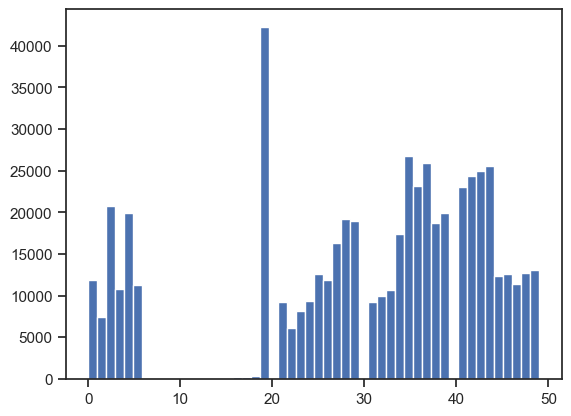

In [77]:
plt.hist(data['condition'], 50)
plt.show()

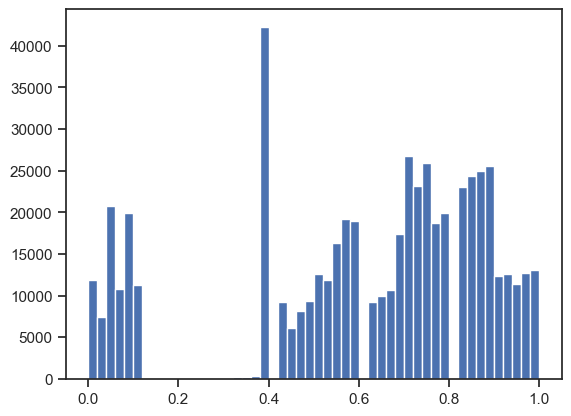

In [78]:
plt.hist(sc1_data, 50)
plt.show()

**Вывод:** данные отмасштабированы от 0 до 1.